In [2]:
import torch
import pylab as plt
import numpy as np
from falcon.contrib.svd import PCAProjector
from falcon.contrib.norms import DiagonalWhitener

In [3]:
nbins = 10230
n_components = 50

projector = PCAProjector(n_components, nbins, device = 'cpu', buffer_size = 128, normalize_output=True, momentum=0.1)
whitener = DiagonalWhitener(nbins, momentum=0.1, track_mean = True, eps=1e-8, use_fourier=False)

def sample(n):
	y = torch.linspace(-torch.pi, torch.pi, nbins)
	Y = torch.stack([torch.cos(y*50), torch.sin(y*50), torch.cos(800*y), torch.sin(800*y)])
	X = torch.randn(n, 4) @ Y + 2
	N = torch.randn(n, nbins)*100
	return X, N

for i in range(20):
	X, N = sample(64)
	whitener.update(N)
	white_X = whitener(X)
	projector.update(white_X)
	

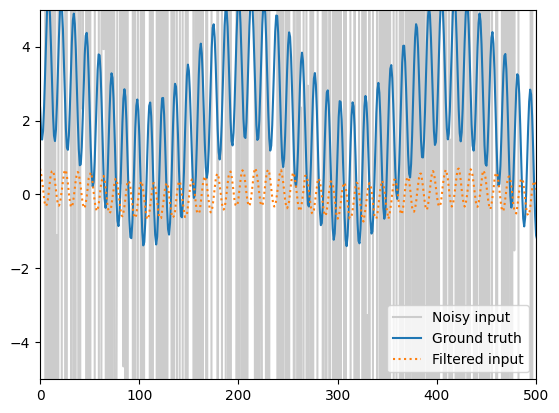

In [4]:
X0, N0 = sample(1)
X = X0 + N0*1.0
white_X = whitener(X)
white_X0 = whitener(X0)
Xr = projector(white_X)
plt.plot(X[0].numpy(), label="Noisy input", color='0.8')
plt.plot(X0[0].numpy(), '-', label="Ground truth")
plt.plot(Xr[0].numpy(), ':', label="Filtered input")
plt.ylim([-5, 5])
plt.xlim([0, 500])
plt.legend()